# Monthly average disease factors & climatology
## HCoV-HKU1 model parameters
* Output: Daily infected/susceptible fraction, $R_0$

In [1]:
# import sys
# dir_wython = '/tigress/wenchang/wython'
# if dir_wython not in sys.path:
#     sys.path.append(dir_wython)

# import packages
from matplotlib import path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

from matplotlib.lines import Line2D

#define figure resolution
#plt.rcParams['figure.dpi'] = 250

/home/mvchung/anaconda3/lib/python3.7/site-packages/xarray/backends/cfgrib_.py:28: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  "Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. "


In [2]:
# customize by time resolution for MERRA-2 dataset that forced the SIRS model
res = 'weekly' # 'weekly' 'daily' 'weekly_spinup21'

In [3]:
# open the daily SIRS output

ifile = f'/tigress/mvchung/ANALYSIS/Disease/HKU1_new/SIRSmodel_output/HKU1_MERRA2_{res}_SIRS_output.nc'
ds = xr.open_dataset(ifile)

ifile = f'/tigress/mvchung/ANALYSIS/Disease/HKU1_new/SIRSmodel_input/HKU1_MERRA2_weekly_R0.nc'
R0 = xr.open_dataarray(ifile)

ds = ds.drop('year')
R0 = R0.isel(time=slice(1,None)) # align with disease output

/home/mvchung/anaconda3/lib/python3.7/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [4]:
# combine the datasets
# 1m 29s

ds = xr.Dataset({
    'IT': (['TIME','LAT', 'LON'], ds.ii.values),
    'ST': (['TIME','LAT', 'LON'], ds.ss.values),
    'R0': (['TIME','LAT', 'LON'], R0.values),
    },
    coords={
        'TIME': R0.time.values,
        'LAT': ds.latitude.values,
        'LON': ds.longitude.values,
    }
)

In [5]:
print(ds)

<xarray.Dataset>
Dimensions:  (LAT: 361, LON: 576, TIME: 13507)
Coordinates:
  * TIME     (TIME) datetime64[ns] 1981-01-05T12:00:00 ... 2017-12-28T12:00:00
  * LAT      (LAT) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * LON      (LON) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Data variables:
    IT       (TIME, LAT, LON) float32 0.005822 0.005822 0.005822 ... 0.014 0.014
    ST       (TIME, LAT, LON) float32 0.4091 0.4091 0.4091 ... 0.5733 0.5733
    R0       (TIME, LAT, LON) float32 2.4 2.4 2.4 2.4 ... 2.308 2.308 2.308


## Monthly mean using resample

In [6]:
# resample daily data into monthly intervals and take monthly mean
# 42s
ds_mm = ds.resample(TIME="M").mean(dim='TIME')

In [7]:
ds_mm

<xarray.Dataset>
Dimensions:  (LAT: 361, LON: 576, TIME: 444)
Coordinates:
  * TIME     (TIME) datetime64[ns] 1981-01-31 1981-02-28 ... 2017-12-31
  * LAT      (LAT) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * LON      (LON) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
Data variables:
    IT       (TIME, LAT, LON) float32 0.005549 0.005549 ... 0.006142 0.006142
    ST       (TIME, LAT, LON) float32 0.4111 0.4111 0.4111 ... 0.5909 0.5909
    R0       (TIME, LAT, LON) float32 2.403 2.403 2.403 ... 2.338 2.338 2.338

In [8]:
ds_mm.to_netcdf(f"./data_{res}/HKU1_monthly_mean.nc")

## Monthly climatology

In [9]:
# 1m 44s
ds_clim = ds_mm.groupby('TIME.month').mean('TIME')

In [10]:
ds_clim.to_netcdf(f"./data_{res}/HKU1_clim_month.nc")
ds_clim

<xarray.Dataset>
Dimensions:  (LAT: 361, LON: 576, month: 12)
Coordinates:
  * LAT      (LAT) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * LON      (LON) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    IT       (month, LAT, LON) float32 0.005547 0.005547 ... 0.009781 0.009781
    ST       (month, LAT, LON) float32 0.4116 0.4116 0.4116 ... 0.5755 0.5755
    R0       (month, LAT, LON) float32 2.409 2.409 2.409 ... 2.375 2.375 2.375

## anomaly from climatology

In [11]:
# 3s
anom = ds_mm.groupby('TIME.month') - ds_clim

In [12]:
anom.to_netcdf(f"./data_{res}/HKU1_anom_month.nc")

# Look at the data

/home/mvchung/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/mvchung/anaconda3/lib/python3.7/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


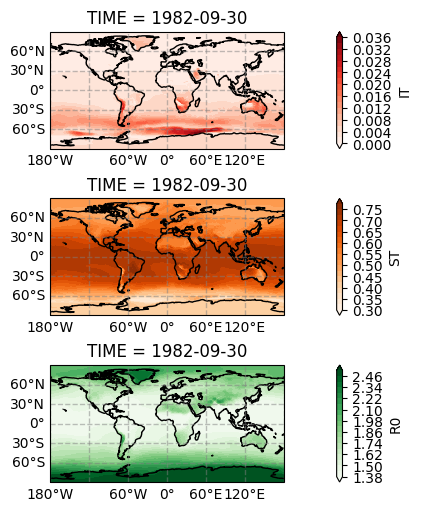

In [13]:
# plot first timestep

index = 20

fig, ax = plt.subplots(3,1,figsize=(12,5),
                        subplot_kw={'projection': ccrs.PlateCarree()},
                      sharex=True, sharey=True, constrained_layout=True)

ds_mm['IT'].isel(TIME=index).plot.contourf(ax=ax[0],transform=ccrs.PlateCarree(),
                                       cmap='Reds',extend='both',levels=21) 

ds_mm['ST'].isel(TIME=index).plot.contourf(ax=ax[1],transform=ccrs.PlateCarree(),
                                       cmap='Oranges',extend='both',levels=21)

ds_mm['R0'].isel(TIME=index).plot.contourf(ax=ax[2],transform=ccrs.PlateCarree(),
                                       cmap='Greens',extend='both',levels=21) 

for axis in ax.flatten():
    gl = axis.gridlines(crs=ccrs.PlateCarree(), 
                        draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top=False
    gl.ylabels_right=False
    gl.xformatter=LONGITUDE_FORMATTER
    gl.yformatter=LATITUDE_FORMATTER
    axis.coastlines(linewidth=1)
    #axis.set_title('')
    #axis.add_feature(cfeature.OCEAN, zorder=100, edgecolor=None)

#plt.autoscale()

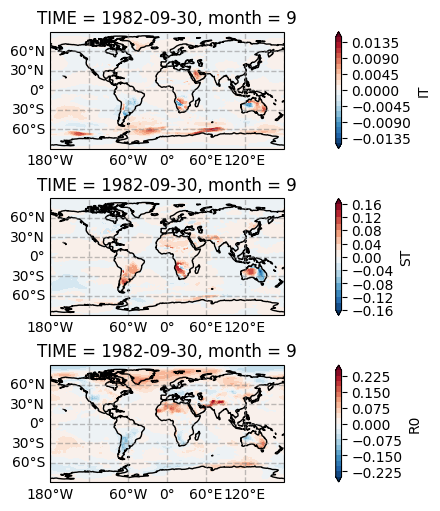

In [14]:
# plot first timestep: anomaly from climatology

fig, ax = plt.subplots(3,1,figsize=(12,5),
                        subplot_kw={'projection': ccrs.PlateCarree()},
                      sharex=True, sharey=True, constrained_layout=True)

anom['IT'].isel(TIME=index).plot.contourf(ax=ax[0],transform=ccrs.PlateCarree(),
                                       cmap='RdBu_r',extend='both',levels=21) 

anom['ST'].isel(TIME=index).plot.contourf(ax=ax[1],transform=ccrs.PlateCarree(),
                                       cmap='RdBu_r',extend='both',levels=21)

anom['R0'].isel(TIME=index).plot.contourf(ax=ax[2],transform=ccrs.PlateCarree(),
                                       cmap='RdBu_r',extend='both',levels=21) 

for axis in ax.flatten():
    gl = axis.gridlines(crs=ccrs.PlateCarree(), 
                        draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top=False
    gl.ylabels_right=False
    gl.xformatter=LONGITUDE_FORMATTER
    gl.yformatter=LATITUDE_FORMATTER
    axis.coastlines(linewidth=1)
    #axis.set_title('')
    #axis.add_feature(cfeature.OCEAN, zorder=100, edgecolor=None)

#plt.autoscale()